# Data Science

### Importer les librairies

In [1]:
import pandas as pd
import numpy
from math import pi
import matplotlib.pyplot as plt

### Explorer les données

In [2]:
#importation des données
cities = pd.read_csv('cities.csv')
providers = pd.read_csv('providers.csv')
stations = pd.read_csv('stations.csv')
ticket = pd.read_csv('ticket_data.csv')

In [3]:
#avoir plus de details sur les données et leurs types
print(ticket.info(), cities.info(), providers.info(), stations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---

In [4]:
#connaitre le nombre de valeurs nulles dans chaque colonne
#dans ce cas les valeurs nulles ne vont pas poser de problème puisque les colonnes qui nous intréssent sont complètes
print("tickets \n ",ticket.isnull().sum(),"\n cities \n ",cities.isnull().sum(),"\n providers \n ",providers.isnull().sum(),"\n stations \n ",stations.isnull().sum())

tickets 
  id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64 
 cities 
  id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64 
 providers 
  id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64 
 stations 
  id             0
unique_name    0
latitude       0
longitude      0
dtype: int64


### Préparation des données

In [5]:
#la colonne 'compagny' de ticket est une foreign key de la colonne 'id' de providers
#donc on fait une jointure sur cette dernière puis on renomme les colonnes qui nous intéressent
df=ticket.join(providers.set_index('id'), on = 'company')
df.rename(columns={'name':'provider_name','fullname':'provider_fullname'},inplace=True)
# de même on fait une joint entre 'ticket' et 'cities' 2 fois : une pour avoir les villes de départ et l'autre l'arrivée
df=df.join(cities.set_index('id'), on = 'o_city')
df.rename(columns={'local_name':'o_local_name','unique_name':'o_unique_name','latitude':'o_latitude','longitude':'o_longitude','population':'o_population'},inplace=True)
df=df.join(cities.set_index('id'), on = 'd_city')
df.rename(columns={'local_name':'d_local_name','unique_name':'d_unique_name','latitude':'d_latitude','longitude':'d_longitude','population':'d_population'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74168 non-null  int64  
 1   company               74168 non-null  int64  
 2   o_station             32727 non-null  float64
 3   d_station             32727 non-null  float64
 4   departure_ts          74168 non-null  object 
 5   arrival_ts            74168 non-null  object 
 6   price_in_cents        74168 non-null  int64  
 7   search_ts             74168 non-null  object 
 8   middle_stations       32727 non-null  object 
 9   other_companies       32727 non-null  object 
 10  o_city                74168 non-null  int64  
 11  d_city                74168 non-null  int64  
 12  company_id            74168 non-null  int64  
 13  provider_id           21704 non-null  object 
 14  provider_name         74168 non-null  object 
 15  provider_fullname  

In [6]:
#creation de la colonne trajet qui identifie le trajet
df['trajet']=df['o_unique_name'] + ' to ' +df['d_unique_name']
df.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,o_unique_name,o_latitude,o_longitude,o_population,d_local_name,d_unique_name,d_latitude,d_longitude,d_population,trajet
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,orleans,47.907018,1.90627,114977.0,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier


In [7]:
#convertir les données horaire en type datetime
df['departure_ts'] = pd.to_datetime(df['departure_ts'])
df['arrival_ts'] = pd.to_datetime(df['arrival_ts'])

In [8]:
#définition d'une colonne de durée du trajet en forma 'dd hh:mm:ss'
df['time_diff']= df['arrival_ts']-df['departure_ts']
#définition d'une colonne de durée du trajet en senconde
df['time_diff_hour']= df['time_diff'].dt.total_seconds()/3600

In [9]:
#calculer la distance en km entre deux villes en utilisant la longitude et la latitude
df['distance']=6378137*numpy.arccos(numpy.sin(df['o_latitude']/180*pi)*numpy.sin(df['d_latitude']/180*pi)+numpy.cos(df['o_latitude']/180*pi)*numpy.cos(df['d_latitude']/180*pi)*numpy.cos(df['o_longitude']/180*pi-df['d_longitude']/180*pi))/1000

In [10]:
#créer nos groupes de trajet
# list des conditions
conditions = [
    (df['distance'] <= 200),
    (df['distance'] > 200) & (df['distance'] <= 800),
    (df['distance'] > 800) & (df['distance'] <= 2000),
    (df['distance'] > 2000)
    ]
values = ['0-200km', '201-800km', '801-2000km', '+2000km']

df['distance_group']=numpy.select(conditions,values)
df.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,d_local_name,d_unique_name,d_latitude,d_longitude,d_population,trajet,time_diff,time_diff_hour,distance,distance_group
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier,0 days 06:10:00,6.166667,503.760865,201-800km
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier,0 days 17:50:00,17.833333,503.760865,201-800km
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier,1 days 07:57:00,31.950000,503.760865,201-800km
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier,0 days 21:35:00,21.583333,503.760865,201-800km
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,"Montpellier, Occitanie, France",montpellier,43.604452,3.918318,275318.0,orleans to montpellier,0 days 21:46:00,21.766667,503.760865,201-800km


### Interpretation des données

In [11]:
#calcul du min, max et moyenne des prix et des durées par trajet (pour calculer la moyenne du temps il fallait utiliser 
#le format numérique et donc utiliser la colonne time_diff_hour)
df.groupby('trajet').agg({'price_in_cents':['min', 'max','mean'],'time_diff':['min','max'],'time_diff_hour':['mean']})

price_in_cents                       \
                                             min    max          mean   
trajet                                                                  
aeroport-paris-vatry- to troyes             5300   5300   5300.000000   
agde to amsterdam                          18600  22000  20320.000000   
agen to dijon                               9860  13650  11755.000000   
agen to marseille                           2000   8920   4042.666667   
agen to marseille-aeroport                  3700   4050   3833.333333   
...                                          ...    ...           ...   
villefranche-sur-cher to bordeaux           3060   7670   5885.000000   
vitre to nice                              15070  21920  18495.000000   
zurich to dijon                             1400   2400   1872.500000   
zurich to liege                             4050   4190   4096.666667   
zurich to strasbourg                        1400   1780   1590.000000   

                                        time_diff                  \
                                              min             max   
trajet                                                              
aeroport-paris-vatry- to troyes   0 days 21:55:00 0 days 21:55:00   
agde to amsterdam                 0 days 08:53:00 0 days 15:54:00   
agen to dijon                     0 days 12:24:00 0 days 15:01:00   
agen to marseille                 0 days 05:36:00 0 days 12:20:00   
agen to marseille-aeroport        0 days 05:00:00 0 days 08:00:00   
...                                           ...             ...   
villefranche-sur-cher to bordeaux 0 days 03:10:00 1 days 13:44:00   
vitre to nice                     0 days 09:53:00 0 days 11:05:00   
zurich to dijon                   0 days 08:10:00 0 days 17:45:00   
zurich to liege                   0 days 05:50:00 0 days 11:30:00   
zurich to strasbourg              0 days 04:55:00 0 days 10:35:00   

                                  time_diff_hour  
                                            mean  
trajet                                            
aeroport-paris-vatry- to troyes        21.916667  
agde to amsterdam                      10.313333  
agen to dijon                          13.708333  
agen to marseille                       8.290000  
agen to marseille-aeroport              5.833333  
...                                          ...  
villefranche-sur-cher to bordeaux      11.675000  
vitre to nice                          10.483333  
zurich to dijon                        12.958333  
zurich to liege                         7.722222  
zurich to strasbourg                    7.000000  

[1437 rows x 6 columns]

In [12]:
#calcul du min, max et moyenne des prix et des durées par groupe de distance et par type de transport
df.groupby(['distance_group','transport_type']).agg({'price_in_cents':['min', 'max','mean'],'time_diff':['min','max'],'time_diff_hour':['mean']})

price_in_cents                       \
                                         min    max          mean   
distance_group transport_type                                       
0-200km        bus                       850  22900   2182.830918   
               carpooling                300  12850   1177.352385   
               train                     490  25100   3487.900779   
201-800km      bus                      1000  22480   3494.850022   
               carpooling                850  13800   3218.064310   
               train                    1400  38550   9124.779489   
801-2000km     bus                      2290  17400   6949.950045   
               carpooling               4496  16150   8626.545455   
               train                    1940  37550  15463.746130   

                                    time_diff                  time_diff_hour  
                                          min              max           mean  
distance_group transport_type                                                  
0-200km        bus            0 days 01:05:00 13 days 05:45:00      10.232515  
               carpooling     0 days 00:20:00  0 days 17:20:00       1.952040  
               train          0 days 00:39:00  1 days 10:27:00       4.419400  
201-800km      bus            0 days 02:29:00 20 days 12:51:00      15.074797  
               carpooling     0 days 01:20:00  0 days 19:50:00       4.763131  
               train          0 days 01:08:00  2 days 00:27:00       7.677651  
801-2000km     bus            0 days 12:15:00 14 days 17:00:00      27.536119  
               carpooling     0 days 07:50:00  1 days 05:10:00      13.100233  
               train          0 days 03:33:00  1 days 16:37:00      12.158617

In [13]:
#total de vente par groupe de distance
price_distance=df.groupby(['distance_group'])['price_in_cents'].agg('sum')/100
print(price_distance)

distance_group
0-200km        230422.16
201-800km     2881344.17
801-2000km     138802.81
Name: price_in_cents, dtype: float64


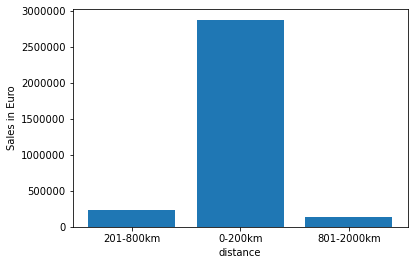

In [14]:
#visualisation par barre du total de vente par groupe de distance
plt.bar(pd.unique(df['distance_group']),price_distance)
plt.ylabel('Sales in Euro')
plt.xlabel('distance')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [15]:
#total de vente par type de transport
price_type=df.groupby(['transport_type'])['price_in_cents'].agg('sum')
print(price_type)

transport_type
bus            50396478
carpooling    113638346
train         161022090
Name: price_in_cents, dtype: int64


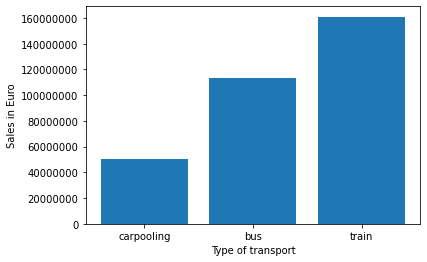

In [16]:
#visualization du total de vente par type de transport
plt.bar(pd.unique(df['transport_type']),price_type)
plt.ylabel('Sales in Euro')
plt.xlabel('Type of transport')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [17]:
#le nombre de ticket vendu par type de transport
transport_count=df.groupby(['transport_type'])['id'].count()
print(transport_count)

transport_type
bus           13798
carpooling    41441
train         18929
Name: id, dtype: int64


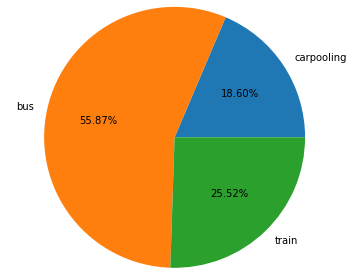

In [18]:
#visualization du nombre de tickets vendu par type de transport
plt.axis('equal')
plt.pie(transport_count,labels=pd.unique(df['transport_type']), radius=1.5,autopct='%0.2f%%')
plt.show()

In [19]:
#le nombre de ticket vendu par trajet
trajet_count=df.groupby(['trajet'])['trajet'].count().sort_values(ascending=False)
#les 10 trajets les plus populaires
print(trajet_count[:10])

trajet
paris to lille        6178
paris to lyon         4105
lyon to paris         3363
paris to nantes       2459
paris to amsterdam    1636
paris to orleans      1270
paris to bordeaux     1205
nantes to paris        992
dijon to lyon          973
paris to marseille     898
Name: trajet, dtype: int64
